In [1]:
import pandas as pd
import seaborn as sns
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from scipy import signal
from datetime import datetime, timedelta

import numpy as np

from bokeh.models import ColumnDataSource, RangeTool, BoxAnnotation, Label, Column, YearsTicker
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, curdoc

In [2]:
effr = pd.read_csv('effr.csv')
print(len(effr))
effr.head()

830


,DATE,EFFR
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [3]:
unrate = pd.read_csv('unrate.csv')
print(len(unrate))
unrate.tail()

908


,DATE,UNEMPLOYMENT
903,2023-04-01,3.4
904,2023-05-01,3.7
905,2023-06-01,3.6
906,2023-07-01,3.5
907,2023-08-01,3.8


In [4]:
nrou = pd.read_csv('nrou.csv')
print(len(nrou))
nrou.dropna(inplace=True)
nrou.tail()

340


,DATE,NROU
303,2024-10-01,4.41
304,2025-01-01,4.40
305,2025-04-01,4.40
306,2025-07-01,4.40
307,2025-10-01,4.39


In [5]:
pce = pd.read_csv('pce.csv')
print(len(pce))
pce.head()

257


,DATE,PCE
0,1959-04-01,2.1
1,1959-07-01,2.7
2,1959-10-01,2.3
3,1960-01-01,1.3
4,1960-04-01,1.5


In [6]:
merged = effr.merge(unrate, on='DATE')
merged = merged.merge(nrou, on='DATE')
merged = merged.merge(pce, on='DATE')

print(len(merged))
merged.tail()

257


,DATE,EFFR,UNEMPLOYMENT,NROU,PCE
252,2022-04-01,0.33,3.6,4.44,4.7
253,2022-07-01,1.68,3.5,4.44,4.7
254,2022-10-01,3.08,3.7,4.43,4.4
255,2023-01-01,4.33,3.4,4.43,4.9
256,2023-04-01,4.83,3.4,4.42,3.7


In [7]:
merged = merged[merged['DATE'] >= '2000-01-01']
merged.head()

,DATE,EFFR,UNEMPLOYMENT,NROU,PCE
163,2000-01-01,5.45,4.0,5.22,2.1
164,2000-04-01,6.02,3.8,5.21,1.4
165,2000-07-01,6.54,4.0,5.20,1.9
166,2000-10-01,6.51,3.9,5.19,2.0
167,2001-01-01,5.98,4.2,5.18,2.6


In [8]:
# merged['EFFR_LAG_12M'] = merged['EFFR'].shift(4)

# merged['UNEMPLOYMENT_LAG_1Y'] = merged['UNEMPLOYMENT'].shift(4)
# merged['UNEMPLOYMENT_LAG_2Y'] = merged['UNEMPLOYMENT'].shift(8)
# merged['UNEMPLOYMENT_LAG_5Y'] = merged['UNEMPLOYMENT'].shift(20)

# merged['PCE_LAG_1Y'] = merged['PCE'].shift(4)
# merged['PCE_LAG_2Y'] = merged['PCE'].shift(8)
# merged['PCE_LAG_2Y'] = merged['PCE'].shift(20)

# merged.head()

In [9]:
merged['UNEMPLOYMENT_SMA_1Y'] = merged['UNEMPLOYMENT'].rolling(4).mean()
merged['UNEMPLOYMENT_SMA_2Y'] = merged['UNEMPLOYMENT'].rolling(8).mean()
merged['UNEMPLOYMENT_SMA_3Y'] = merged['UNEMPLOYMENT'].rolling(12).mean()
merged['UNEMPLOYMENT_SMA_4Y'] = merged['UNEMPLOYMENT'].rolling(16).mean()
merged['UNEMPLOYMENT_SMA_5Y'] = merged['UNEMPLOYMENT'].rolling(20).mean()

merged['NROU_SMA_1Y'] = merged['NROU'].rolling(4).mean()
merged['NROU_SMA_2Y'] = merged['NROU'].rolling(8).mean()
merged['NROU_SMA_3Y'] = merged['NROU'].rolling(12).mean()
merged['NROU_SMA_4Y'] = merged['NROU'].rolling(16).mean()
merged['NROU_SMA_5Y'] = merged['NROU'].rolling(20).mean()

merged['PCE_SMA_1Y'] = merged['PCE'].rolling(4).mean()
merged['PCE_SMA_1Y_LAG_1Y'] = merged['PCE_SMA_1Y'].shift(4)
merged['PCE_LAG_1Y'] = merged['PCE'].shift(4)
merged['PCE_SMA_2Y'] = merged['PCE'].rolling(8).mean()
merged['PCE_SMA_3Y'] = merged['PCE'].rolling(12).mean()
merged['PCE_SMA_4Y'] = merged['PCE'].rolling(16).mean()
merged['PCE_SMA_5Y'] = merged['PCE'].rolling(20).mean()


merged.tail()

,DATE,EFFR,UNEMPLOYMENT,NROU,PCE,UNEMPLOYMENT_SMA_1Y,UNEMPLOYMENT_SMA_2Y,UNEMPLOYMENT_SMA_3Y,UNEMPLOYMENT_SMA_4Y,UNEMPLOYMENT_SMA_5Y,...,NROU_SMA_3Y,NROU_SMA_4Y,NROU_SMA_5Y,PCE_SMA_1Y,PCE_SMA_1Y_LAG_1Y,PCE_LAG_1Y,PCE_SMA_2Y,PCE_SMA_3Y,PCE_SMA_4Y,PCE_SMA_5Y
252,2022-04-01,0.33,3.6,4.44,4.7,4.375,5.8750,6.041667,5.48125,5.210,...,4.480833,4.501875,4.5215,4.975,3.475,6.0,4.2250,3.125000,2.77500,2.625
253,2022-07-01,1.68,3.5,4.44,4.7,3.900,5.0375,6.025000,5.46250,5.170,...,4.472500,4.493125,4.5130,4.950,3.875,4.8,4.4125,3.383333,2.98125,2.795
254,2022-10-01,3.08,3.7,4.43,4.4,3.700,4.6375,6.033333,5.45625,5.145,...,4.465000,4.484375,4.5045,4.850,4.700,4.8,4.7750,3.650000,3.13750,2.915
255,2023-01-01,4.33,3.4,4.43,4.9,3.550,4.2750,6.025000,5.41875,5.115,...,4.458333,4.476250,4.4960,4.675,5.300,5.6,4.9875,3.900000,3.35000,3.030
256,2023-04-01,4.83,3.4,4.42,3.7,3.500,3.9375,5.083333,5.40625,5.085,...,4.451667,4.468125,4.4875,4.425,4.975,4.7,4.7000,4.291667,3.45000,3.105


                            OLS Regression Results                            
Dep. Variable:             PCE_LAG_1Y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     11.89
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           0.000868
Time:                        16:52:55   Log-Likelihood:                -125.24
No. Observations:                  90   AIC:                             254.5
Df Residuals:                      88   BIC:                             259.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6149      0.139     11.591      0.0

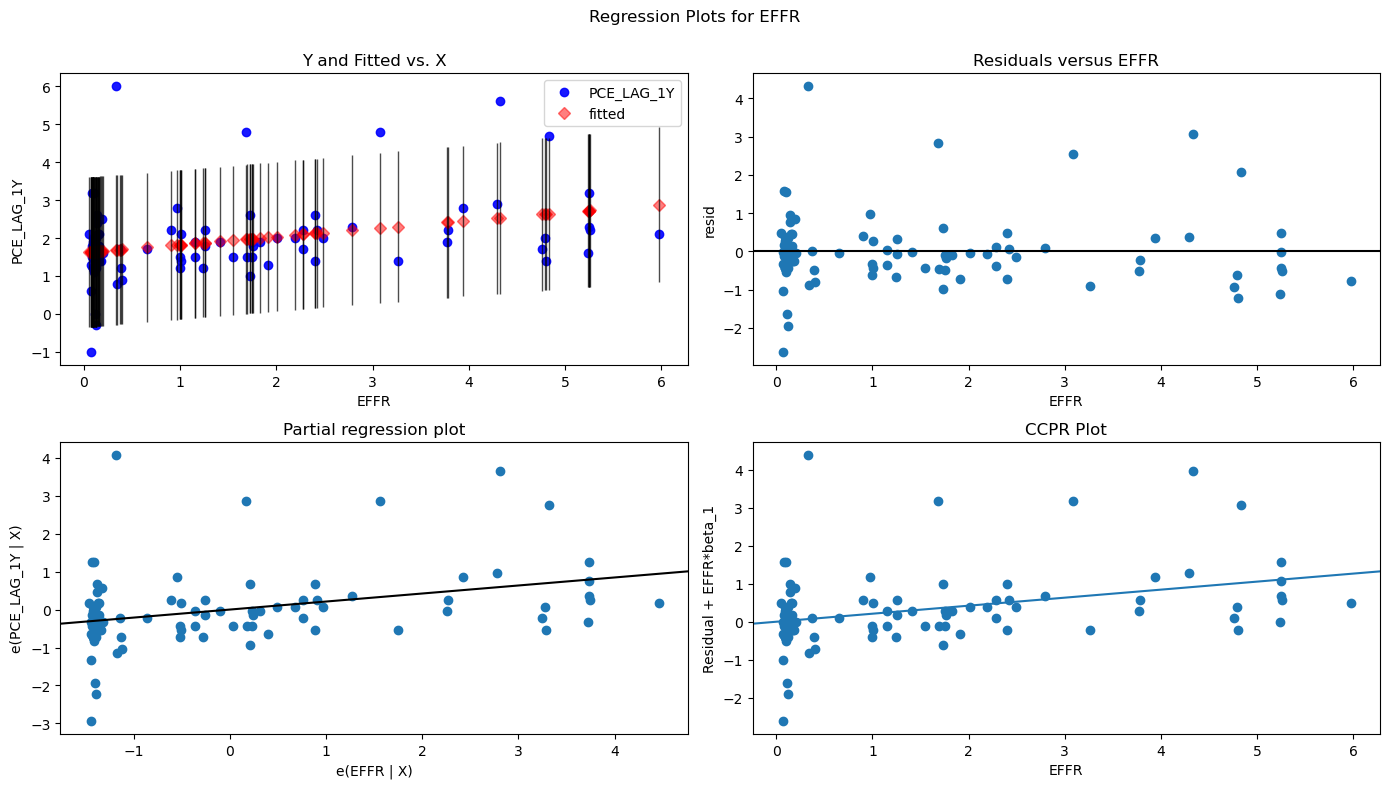

In [10]:
# fit simple linear regression model
mod = ols('PCE_LAG_1Y ~ EFFR',
                   data=merged).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR',
                                    fig=fig)

                            OLS Regression Results                            
Dep. Variable:                   NROU   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     25.97
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.84e-06
Time:                        16:52:56   Log-Likelihood:                 15.770
No. Observations:                  94   AIC:                            -27.54
Df Residuals:                      92   BIC:                            -22.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7022      0.029    163.776      0.0

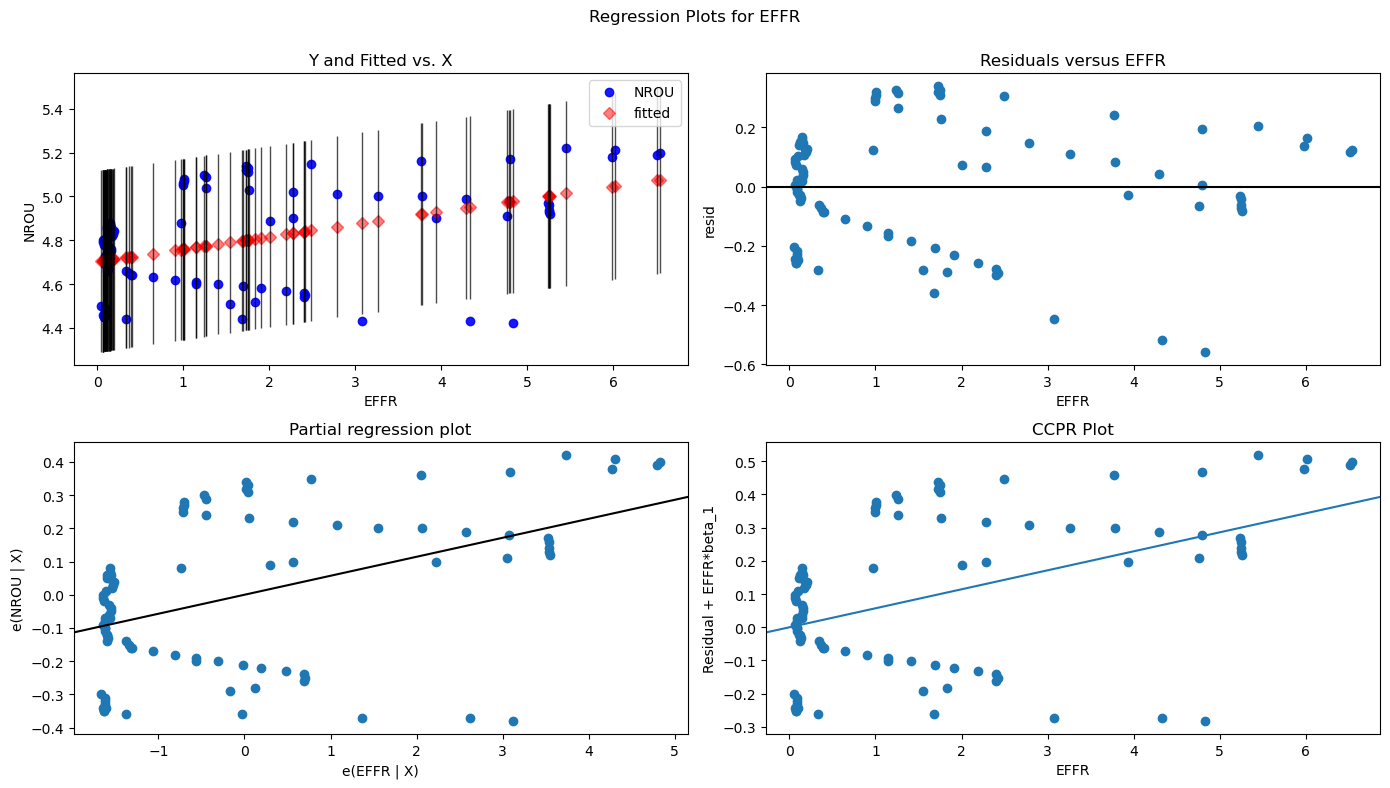

In [11]:
# fit simple linear regression model
mod = ols('NROU ~ EFFR',
                   data=merged).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR',
                                    fig=fig)

In [12]:
output_notebook()
curdoc().theme = 'dark_minimal'

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)
range_mid_date = int(len(dates) / 2) + 1
range_end_date = dates[len(dates) - 1]

effr_color =  '#009E73'

pce_color = '#56B4E9'
pce_sma_color = 'beige'

unemp_color = '#E69F00'
unemp_sma_color = 'beige'

Loading BokehJS ...

In [13]:
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))

unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))
nrou_src = ColumnDataSource(data=dict(date=dates, rate=merged['NROU']))

unemp_src = unemp_src

p = figure(title='EFFR, Unemployment Moving Avg', height=300, width=800, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

p.line('date', 'rate', source=effr_src, color=effr_color, legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=unemp_src, color=unemp_color, legend_label='Unemployment')
p.line('date', 'rate', source=nrou_src, color=pce_color, legend_label='NROU')
p.yaxis.axis_label = 'Rate'

#p.line('date', 'rate', source=effr_chg_src, color='#3195ce', legend_label='EFFR % (1-month change)')
#p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='Inflation (12-month % change)')
#p.line('date', 'rate', source=unemp_lag_src, color='#009E73', legend_label='Lagged Unemployment (12 Months)')
# p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')

# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.3
# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=130, width=800, y_range=p.y_range,
#                 x_axis_type="datetime", y_axis_type=None,
#                 toolbar_location=None)

# select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=unemp_no_lag_src, color='#E69F00')
# #select.ygrid.grid_line_color = None
# select.add_tools(range_tool)
#show(Column(p, select))

show(Column(p))

In [14]:
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
pce_src = ColumnDataSource(data=dict(date=dates, rate=merged['PCE_SMA_2Y']))

p = figure(title='EFFR, PCE Moving Avg', height=300, width=800, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

p.line('date', 'rate', source=effr_src, color=effr_color, legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=pce_src, color=pce_color, legend_label='PCE Moving Average (2Y)')
p.hspan(y=[2.0],line_width=[1], line_color="red", line_dash='dashed')
p.yaxis.axis_label = 'Rate'

# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.2

# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=400, width=800, y_range=p.y_range,
#                 x_axis_type="datetime")

# select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=pce_src, color='#E69F00')
# #select.ygrid.grid_line_color = None
# select.add_tools(range_tool)


show(Column(p))

In [15]:
# import numpy as np

# from bokeh.layouts import column
# from bokeh.models import ColumnDataSource, RangeTool, Span, BoxAnnotation, Label
# from bokeh.plotting import figure
# from bokeh.io import output_notebook, show

# output_notebook()

In [19]:
# The lowest level of unemployment that the economy can sustain changes over time as the jobs market changes

data_src = ColumnDataSource(data=dict(date=dates, rate=merged['PCE']))
data_src_sma = ColumnDataSource(data=dict(date=dates, rate=merged['PCE_SMA_2Y']))

p = figure(height=400, width=900, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

title = '''
Fed Monetary Policy has been EFFECTIVE in keeping long-term inflation stable and low (2% target).
'''
p.title.text = title
p.title.align = "left"
p.title.text_font_size = "15px"
p.title.text_color = effr_color

#p.line('date', 'rate', source=effr_src, color='#E69F00', legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=data_src, color=pce_color, legend_label='PCE')
p.line('date', 'rate', source=data_src_sma, color=pce_sma_color, legend_label='PCE Moving Average (2Y)', line_dash='dotted')
p.yaxis.axis_label = 'Rate'

#p.legend.align = 'left'
p.legend.label_text_font_size = '10px'
p.legend.location = 'top_right'

#p.grid.dimension = 1

#p.hspan(y=[merged['UNEMPLOYMENT'].mean()],line_width=[1], line_color="#E69F00", line_dash='dashed')
p.hspan(y=[2.0],line_width=[1], line_color="red", line_dash='dashed')

black_swan_events = [
#   ('9/11', pd.to_datetime('2001-09-11'), 15),
#     ('SARS', pd.to_datetime('2003-01-14'), 40),
    ('Global Financial Crisis', pd.to_datetime('2007-10-09'), 1022),
#     ('Libya Intervention', pd.to_datetime('2011-02-18'), 29),
#     ('Brexit', pd.to_datetime('2016-06-08'), 9),
    ('COVID-19', pd.to_datetime('2019-02-19'), 1500)
    ]
for bse in black_swan_events:
    box = BoxAnnotation(left=bse[1], right=bse[1] + timedelta(days=bse[2]), fill_alpha=0.2, fill_color='pink')
    label = Label(x=bse[1], y=0, x_units='data', y_units='screen', text=bse[0],
              border_line_color=None, text_font_size='10px',text_color='white',
              background_fill_color=None, background_fill_alpha=1.0)    
    p.add_layout(box)
    p.add_layout(label)
    
# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.2

# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=130, width=800, y_range=p.y_range,
#                 x_axis_type="datetime", y_axis_type=None)


# select.line('date', 'rate', source=unemp_src, color='#E69F00')
# select.ygrid.grid_line_color = None
# select.add_tools(range_tool)


show(Column(p))

In [20]:
data_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))
data_src_sma = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT_SMA_2Y']))
data_nrou_src = ColumnDataSource(data=dict(date=dates, rate=merged['NROU']))

p = figure(height=400, width=900, tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], range_end_date))

title = '''
Fed Monetary Policy has been INEFFECTIVE in fulfilling the Maximum Employment mandate, measured against 
the long-term Non-Cyclical Rate of Unemployment (NROU).
'''
p.title.text = title
p.title.align = "left"
p.title.text_font_size = "15px"
p.title.text_color = '#e34a33'

#p.line('date', 'rate', source=effr_src, color='#E69F00', legend_label='Effective Federal Funds Rate')
p.line('date', 'rate', source=data_src, color=unemp_color, legend_label='Unemployment')
p.line('date', 'rate', source=data_src_sma, color=unemp_sma_color, legend_label='Unemployment Moving Average (2Y)', line_dash='dotted')
p.line('date', 'rate', source=data_nrou_src, color='red', legend_label='NROU', line_dash='dotted')
p.yaxis.axis_label = 'Rate'

#p.legend.align = 'left'
p.legend.label_text_font_size = '10px'
p.legend.location = 'top_right'

#p.grid.dimension = 1

#p.hspan(y=[merged['UNEMPLOYMENT'].mean()],line_width=[1], line_color="#E69F00", line_dash='dashed')
#p.hspan(y=[4.4],line_width=[1], line_color="red", line_dash='dashed')

black_swan_events = [
#   ('9/11', pd.to_datetime('2001-09-11'), 15),
#     ('SARS', pd.to_datetime('2003-01-14'), 40),
    ('Global Financial Crisis', pd.to_datetime('2007-10-09'), 1022),
#     ('Libya Intervention', pd.to_datetime('2011-02-18'), 29),
#     ('Brexit', pd.to_datetime('2016-06-08'), 9),
    ('COVID-19', pd.to_datetime('2019-02-19'), 1500)
    ]
for bse in black_swan_events:
    box = BoxAnnotation(left=bse[1], right=bse[1] + timedelta(days=bse[2]), fill_alpha=0.2, fill_color='pink')
    label = Label(x=bse[1], y=0, x_units='data', y_units='screen', text=bse[0],
              border_line_color=None, text_font_size='10px',text_color='white',
              background_fill_color=None, background_fill_alpha=1.0)    
    p.add_layout(box)
    p.add_layout(label)
    
# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "white"
# range_tool.overlay.fill_alpha = 0.2

# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 height=130, width=800, y_range=p.y_range,
#                 x_axis_type="datetime", y_axis_type=None)


# select.line('date', 'rate', source=unemp_src, color='#E69F00')
# select.ygrid.grid_line_color = None
# select.add_tools(range_tool)


show(Column(p))